# Foundations of Computational Economics #13

by Fedor Iskhakov, ANU

<img src="_static/img/dag3logo.png" style="width:256px;">

## Two very important algorithms for solving equations

<img src="_static/img/lab.png" style="width:64px;">

<img src="_static/img/youtube.png" style="width:65px;">

[https://youtu.be/gUdYS5PmvWo](https://youtu.be/gUdYS5PmvWo)

Description: Bisections and Newton-Raphson methods. Solving equations of one variable. Accuracy of solution. Rates of convergence.

### Classic algorithm for equation solving

1. Bisection method  
1. Newton-Raphson method  


Solve equations of the form $ f(x) = 0 $

Focus on the scalar case today.

#### Bisection method for solving equations

Solve equation $ f(x)=0 $, conditional on $ x \in [a,b] \subset \mathbb{R} $ such that $ f(a)f(b)<0 $

Algorithm: similar to binary search, but in **continuous space**.

In [1]:
def bisection(f,a=0,b=1,tol=1e-6,maxiter=100,callback=None):
    '''Bisection method for solving equation f(x)=0
    on the interval [a,b], with given tolerance and number of iterations.
    Callback function is invoked at each iteration if given.
    '''
    pass

In [6]:
f = lambda x: -4*x**3+5*x+1
a,b = -3,-.5  # upper and lower limits
x = bisection(f,a,b)
print('Solution is x=%1.3f, f(x)=%1.12f' % (x,f(x)))

Solution is x=-1.000, f(x)=0.000000834465


Converged in 22 steps


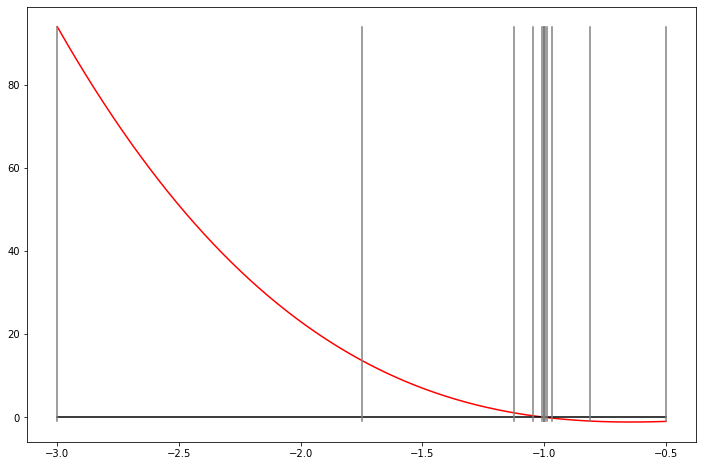

In [7]:
# make nice plot
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
xd = np.linspace(a,b,1000)  # x grid
plt.plot(xd,f(xd),c='red')  # plot the function
plt.plot([a,b],[0,0],c='black')  # plot zero line
ylim=[f(a),min(f(b),0)]
plt.plot([a,a],ylim,c='grey')  # plot lower bound
plt.plot([b,b],ylim,c='grey')  # plot upper bound
def plot_step(x,**kwargs):
    plot_step.counter += 1
    plt.plot([x,x],ylim,c='grey')
plot_step.counter = 0  # new public attribute
bisection(f,a,b,callback=plot_step)
print('Converged in %d steps'%plot_step.counter)
plt.show()

In [5]:
def bisection(f,a=0,b=1,tol=1e-6,maxiter=100,callback=None):
    '''Bisection method for solving equation f(x)=0
    on the interval [a,b], with given tolerance and number of iterations.
    Callback function is invoked at each iteration if given.
    '''
    if f(a)*f(b)>0:
        raise ValueError('Function has the same sign at the bounds')
    for i in range(maxiter):
        err = abs(b-a)
        if err<tol: break
        x = (a+b)/2
        a,b = (x,b) if f(a)*f(x)>0 else (a,x)
        if callback != None: callback(err=err,x=x,iter=i)
    else:
        raise RuntimeError('Failed to converge in %d iterations'%maxiter)
    return x

#### Newton-Raphson (Newton) method

General form $ f(x)=0 $

- Equation solving  
- Finding maximum/minimum based on FOC, then $ f(x)=Q'(x) $  


Algorithm:
1. Start with some good guess $ x_0 $ not too far from the solution
2. Newton step: $ x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)} $
3. Iterate until convergence in some metric

#### Derivation for Newton method using Taylor series expansion

$$
f(x) = \sum_{k=0}^{\infty} \frac{f^{(k)}(x_0)}{k!} (x-x_0)^k
$$

Take first two terms, assume $ f(x) $ is solution, and let
$ x_0=x_i $ and $ x=x_{i+1} $

$$
0 = f(x) = f(x_i) + f'(x_i) (x_{i+1}-x_i) \quad \Rightarrow \quad x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)}
$$

In [5]:
def newton(fun,grad,x0,tol=1e-6,maxiter=100,callback=None):
    '''Newton method for solving equation f(x)=0
    with given tolerance and number of iterations.
    Callback function is invoked at each iteration if given.
    '''
    pass

In [9]:
f = lambda x: -4*x**3+5*x+1
g = lambda x: -12*x**2+5
x = newton(f,g,x0=-2.5,maxiter=7)
print('Solution is x=%1.3f, f(x)=%1.12f' % (x,f(x)))

Solution is x=-1.000, f(x)=0.000000490965


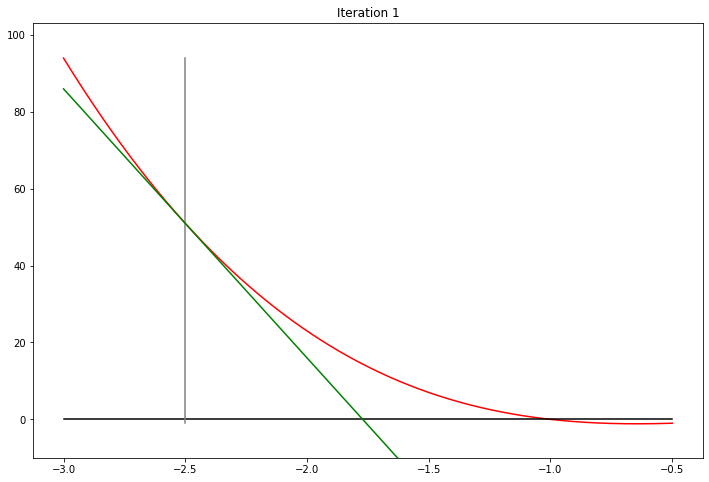

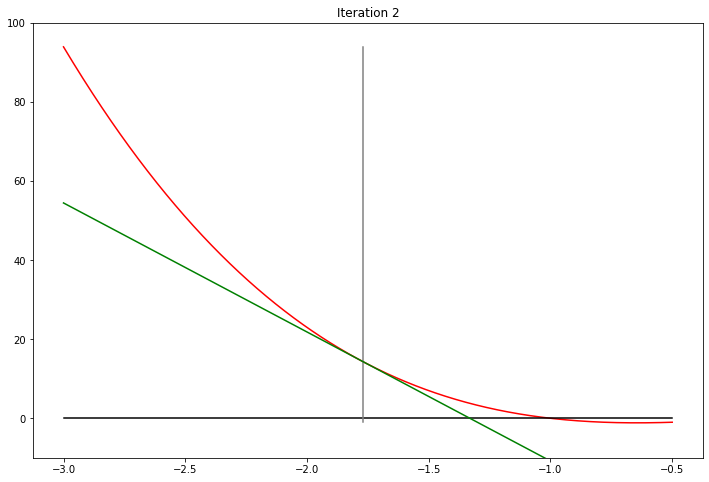

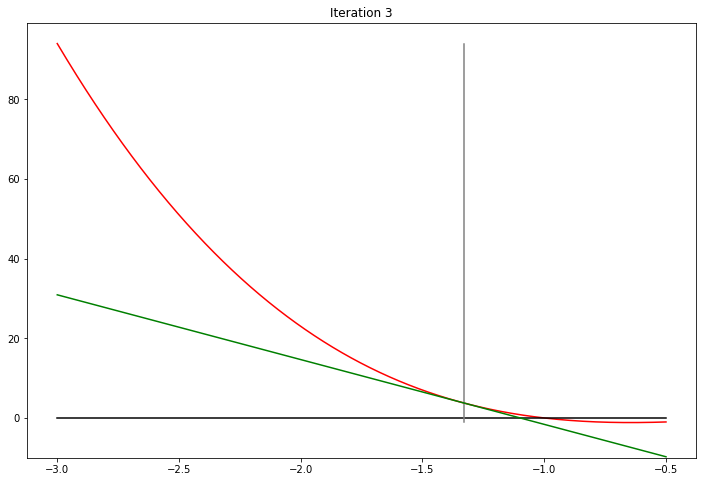

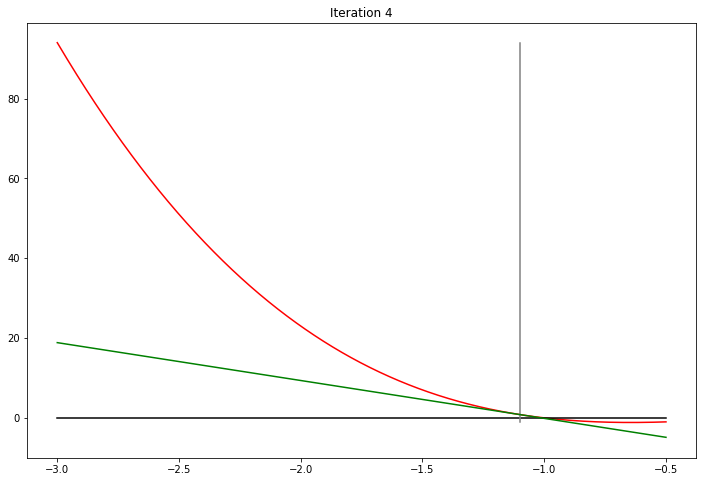

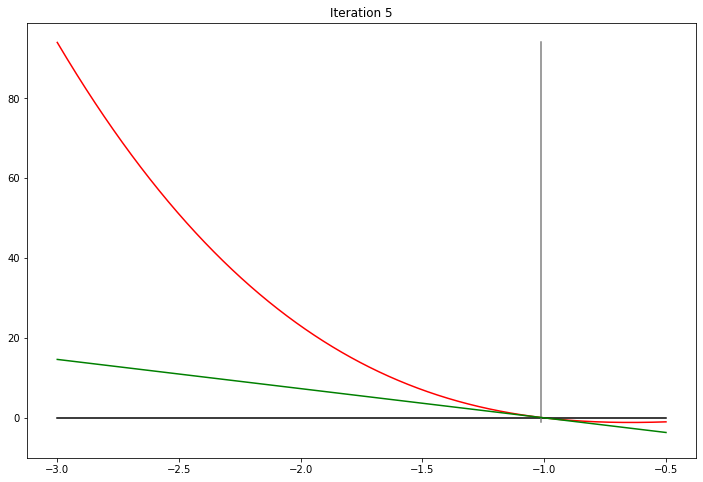

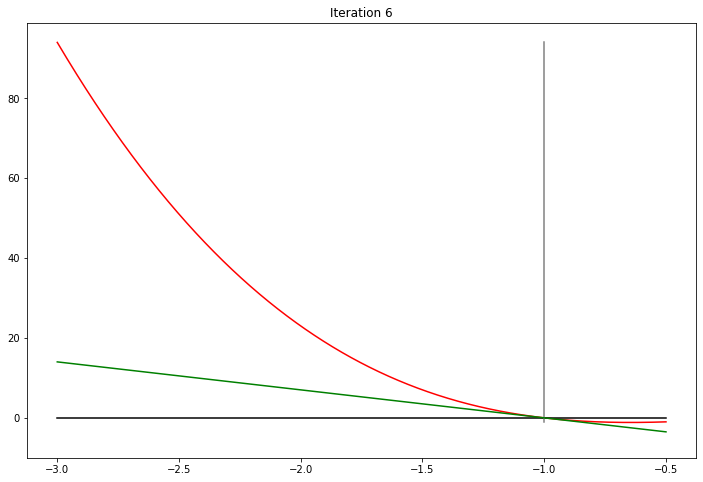

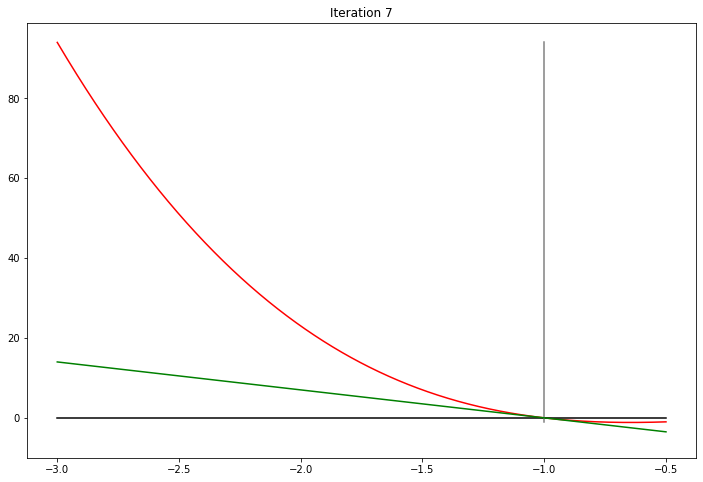

Converged in 7 steps


In [10]:
# make nice seriest of plots
a,b = -3,-.5  # upper and lower limits
xd = np.linspace(a,b,1000)  # x grid
def plot_step(x0,x1,iter,**kwargs):
    plot_step.counter += 1
    if iter<10:
        plt.plot(xd,f(xd),c='red')  # plot the function
        plt.plot([a,b],[0,0],c='black')  # plot zero line
        ylim = [min(f(b),0),f(a)]
        plt.plot([x0,x0],ylim,c='grey') # plot x0
        l = lambda z: g(x0)*(z - x1)
        plt.plot(xd,l(xd),c='green')  # plot the function
        plt.ylim(bottom=10*f(b))
        plt.title('Iteration %d'%(iter+1))
        plt.show()
plot_step.counter = 0  # new public attribute
newton(f,g,x0=-2.5,callback=plot_step)
print('Converged in %d steps'%plot_step.counter)

In [8]:
def newton(fun,grad,x0,tol=1e-6,maxiter=100,callback=None):
    '''Newton method for solving equation f(x)=0
    with given tolerance and number of iterations.
    Callback function is invoked at each iteration if given.
    '''
    for i in range(maxiter):
        x1 = x0 - fun(x0)/grad(x0)
        err = abs(x1-x0)
        if callback != None: callback(err=err,x0=x0,x1=x1,iter=i)
        if err<tol: break
        x0 = x1
    else:
        raise RuntimeError('Failed to converge in %d iterations'%maxiter)
    return (x0+x1)/2

#### Rate of convergence of the two methods

- How fast does a solution method converge on the root of the equation?  
- Rate of convergence = the rate of decrease of the bias (difference between current guess and the solution)  
- Can be approximated by the rate of decrease of the error in the stopping criterion  


Bisections: **linear convergence**

Newton: **quadratic convergence**

In [9]:
def print_err(iter,err,**kwargs):
    x = kwargs['x'] if 'x' in kwargs.keys() else kwargs['x0']
    print('{:4d}:  x = {:17.14f}  err = {:8.6e}'.format(iter,x,err))

print('Newton method')
newton(f,g,x0=-2.5,callback=print_err,tol=1e-10)

print('Bisection method')
bisection(f,a=-3,b=-0.5,callback=print_err,tol=1e-10)

Newton method
   0:  x = -2.50000000000000  err = 7.285714e-01
   1:  x = -1.77142857142857  err = 4.402791e-01
   2:  x = -1.33114944950557  err = 2.323743e-01
   3:  x = -1.09877514383983  err = 8.562251e-02
   4:  x = -1.01315263007170  err = 1.286646e-02
   5:  x = -1.00028616796687  err = 2.860277e-04
   6:  x = -1.00000014027560  err = 1.402756e-07
   7:  x = -1.00000000000003  err = 3.375078e-14
Bisection method
   0:  x = -1.75000000000000  err = 2.500000e+00
   1:  x = -1.12500000000000  err = 1.250000e+00
   2:  x = -0.81250000000000  err = 6.250000e-01
   3:  x = -0.96875000000000  err = 3.125000e-01
   4:  x = -1.04687500000000  err = 1.562500e-01
   5:  x = -1.00781250000000  err = 7.812500e-02
   6:  x = -0.98828125000000  err = 3.906250e-02
   7:  x = -0.99804687500000  err = 1.953125e-02
   8:  x = -1.00292968750000  err = 9.765625e-03
   9:  x = -1.00048828125000  err = 4.882812e-03
  10:  x = -0.99926757812500  err = 2.441406e-03
  11:  x = -0.99987792968750  err = 1.

-0.9999999999563443

#### Measuring complexity of Newton and bisection methods

- What is the size of input $ n $?  
- Desired precision of the solution!  
- Thus, attention to the errors in the solution as algorithm proceeds  
- Rate of convergence is part of the computational complexity of the algorithms  

#### Computational complexity of Newton method

- Calculating a root of a function f(x) **with n-digit precision**  
- Provided that a good initial approximation is known  
- Is $ O((logn)F(n)) $, where $ F(n) $ is the cost of  
- calculating $ f(x)/f'(x) $ with $ n $-digit precision  

### Further learning resources

- On computational complexity of Newton method
  [https://m.tau.ac.il/~tsirel/dump/Static/knowino.org/wiki/Newton’s_method.html#Computational_complexity](https://m.tau.ac.il/~tsirel/dump/Static/knowino.org/wiki/Newton's_method.html#Computational_complexity)  
- “Improved convergence and complexity analysis of Newton’s method for solving equations”
  [https://www.tandfonline.com/doi/abs/10.1080/00207160601173431?journalCode=gcom20](https://www.tandfonline.com/doi/abs/10.1080/00207160601173431?journalCode=gcom20)  